# Handwritten digit recognition with MNIST Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Load data from Keras

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

## Visualizing the Image Data

(28, 28)


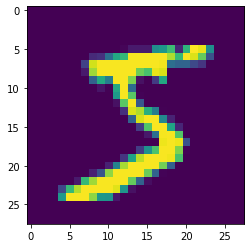

In [8]:
single_image = x_train[0]
plt.imshow(single_image)

print(single_image.shape)

## Preprocessing Data

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape

(60000,)

In [13]:
y_example = to_categorical(y_train)

In [14]:
y_example.shape

(60000, 10)

In [15]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_train = to_categorical(y_train, num_classes=10)

In [22]:
print('y-test-set: ',y_cat_test.shape)
print('y-train-set',y_cat_train.shape)

y-test-set:  (10000, 10)
y-train-set (60000, 10)


### Normalize/Scale Training data

In [23]:
print('Max value in train data: ', single_image.max())
print('Min value in train data: ', single_image.max())

Max value in train data:  255
Min value in train data:  255


**It should be in 0 to 1 as Normalization/Standardization.**

Here we need to scale all the train and test both because of image data.

In [25]:
x_train = x_train/255
x_test = x_test/255

In [26]:
scaled_image = x_train[0]

In [27]:
print('Max value in scaled data: ', scaled_image.max())
print('Min value in train data: ', scaled_image.min())

Max value in scaled data:  1.0
Min value in train data:  0.0


**Ratio of original image is still the same as before**

Let's see the image

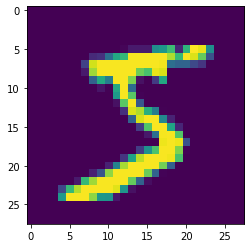

In [29]:
plt.imshow(scaled_image)

### Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation.

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [30]:
x_train.shape

(60000, 28, 28)

**Reshape to include channel dimension (in this case, 1 channel)**

In [39]:
# batch-size, width, height, number of color_channels 
x_train = x_train.reshape(60000, 28, 28, 1)

In [40]:
x_train.shape

(60000, 28, 28, 1)

In [44]:
# batch-size, width, height, number of color_channels 
x_test = x_test.reshape(10000, 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

## Create and Training the Model

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

**Common points**
    *  filters depends on what are you finding from images
    *  kernel_size=(4,4) is good enough
    * padding 
         'valid' --> 'No padding'
        'same' --> 'Padding is provided'
    
    * pool_size should be almost half of kernel_size

In [63]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [64]:
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [67]:
model.fit(x=x_train,
          y=y_cat_train,
          epochs=10,
          validation_data=(x_test,y_cat_test),
          callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 66s 1ms/sample - loss: 0.0480 - accuracy: 0.9851 - val_loss: 0.0392 - val_accuracy: 0.9856
Epoch 2/10
60000/60000 [==============================] - 52s 864us/sample - loss: 0.0311 - accuracy: 0.9899 - val_loss: 0.0459 - val_accuracy: 0.9859
Epoch 3/10
60000/60000 [==============================] - 56s 942us/sample - loss: 0.0209 - accuracy: 0.9935 - val_loss: 0.0404 - val_accuracy: 0.9882


In [71]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.047953,0.985083,0.039154,0.9856
1,0.031128,0.989900,0.045915,0.9859
2,0.020939,0.993500,0.040441,0.9882


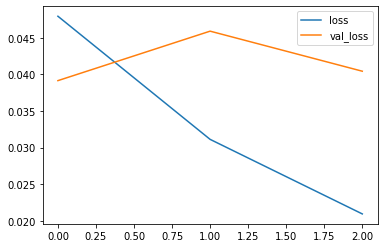

In [73]:
metrics[['loss', 'val_loss']].plot()

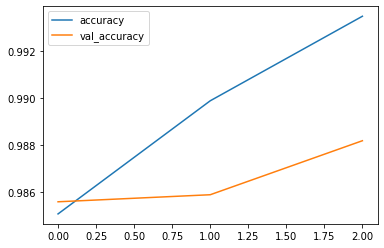

In [74]:
metrics[['accuracy', 'val_accuracy']].plot()

## Evaluate the Model

In [75]:
model.metrics_names

['loss', 'accuracy']

In [76]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.04044133666060225, 0.9882]


In [77]:
from sklearn.metrics import classification_report,confusion_matrix

In [78]:
predictions = model.predict_classes(x_test)

In [79]:
y_cat_test.shape

(10000, 10)

In [81]:
print('Prediction: ',predictions[0])
print('y-test: ',y_test)

Prediction:  7
y-test:  [7 2 1 ... 4 5 6]


In [82]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [83]:
confusion_matrix(y_test,predictions)

array([[ 975,    0,    1,    1,    0,    0,    1,    0,    2,    0],
       [   0, 1127,    1,    2,    0,    0,    2,    1,    2,    0],
       [   1,    2, 1021,    2,    0,    0,    1,    4,    1,    0],
       [   0,    0,    1, 1003,    0,    3,    0,    1,    2,    0],
       [   0,    1,    1,    0,  975,    0,    0,    0,    1,    4],
       [   0,    0,    0,   10,    0,  877,    5,    0,    0,    0],
       [   4,    2,    0,    1,    2,    1,  947,    0,    1,    0],
       [   0,    1,    9,    3,    0,    0,    0, 1013,    1,    1],
       [   2,    0,    1,    4,    0,    0,    1,    1,  964,    1],
       [   1,    2,    1,    3,    9,    3,    0,    7,    3,  980]],
      dtype=int64)

In [84]:
import seaborn as sns

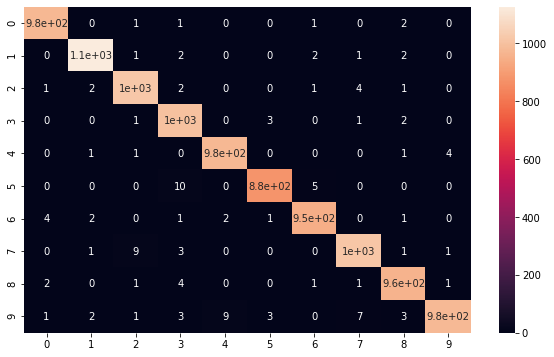

In [85]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

## Predicting a given image

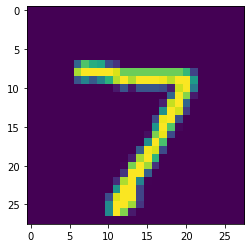

In [86]:
my_number = x_test[0]
plt.imshow(my_number.reshape(28,28))

In [87]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)

**CNN Performed Quite Well!**